# Get some data on the momentum first ...


In [2]:
%run /eos/project/l/liu/Toolbox/myToolbox.py
print '---'
%run /eos/user/e/esenes/PS-analysis-tools/eTools.py
print '---'

Version 0.03. This is the latest version.
Please help me to improve it reporting bugs to guido.sterbini@cern.ch.
Your platform is Linux-3.10.0-693.11.6.el7.centos.plus.x86_64-x86_64-with-redhat-6.9-Carbon
Your folder is /eos/user/e/esenes/PS-injection-steering/Data analysis/KFA45_voltage_kick_rigidity_calibration
Your IP is 172.17.0.6
2018-08-13 14:10:12
---
Version 0.1
Use at your own risk. Please report bugs to eugenio.senes@cern.ch
Fork it at https://gitlab.cern.ch/esenes/PS-analysis-tools
---


In [49]:
folderPath = '/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.08.13/energy_momentum_sample'

matlabVars = ['PR_BETA_ST.Samples.value.samples',
              'PR_GAMMA_ST.Samples.value.samples',
              'PR_MOMENTUM_ST.Samples.value.samples',
              'PR_TOTENERGY_ST.Samples.value.samples',
              'PR_KINENERGY_ST.Samples.value.samples']


In [50]:
# let's start with the matlab data
files_fb = sorted(glob.glob(folderPath+'/BCMS_flat_bottom/2018*.mat'))
print 'Found ' + str(len(files_fb)) + ' data files'
files_5GeV = sorted(glob.glob(folderPath+'/5GeV/2018*.mat'))
print 'Found ' + str(len(files_5GeV)) + ' data files'
files_26GeV = sorted(glob.glob(folderPath+'/26GeV/2018*.mat'))
print 'Found ' + str(len(files_26GeV)) + ' data files'
files = files_fb + files_5GeV + files_26GeV

Found 2 data files
Found 4 data files
Found 3 data files


In [51]:
myDataFrame = myToolbox.fromMatlabToDataFrame(files,matlabVars,verbose=False)

In [76]:
p_injection = 1e-3*myDataFrame['PR_MOMENTUM_ST.Samples.value.samples'].iloc[1][5000]
p_5GeV = 1e-3*myDataFrame['PR_MOMENTUM_ST.Samples.value.samples'].iloc[3][10000]
p_26GeV = 1e-3*myDataFrame['PR_MOMENTUM_ST.Samples.value.samples'].iloc[7][15000]

print('From the sampler:')
print(' Momentum at injection energy: '+str(p_injection)+ ' GeV/c')
print(' Momentum at 5GeV: '+str(p_5GeV)+ ' GeV/c')
print(' Momentum at 26GeV: '+str(p_26GeV)+ ' GeV/c')

From the sampler:
 Momentum at injection energy: 2.1292959 GeV/c
 Momentum at 5GeV: 4.83214092 GeV/c
 Momentum at 26GeV: 26.366431725 GeV/c


# ... and now get something about the voltage-to-kick measured at injection energy

In [28]:
folderPath = '/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.08.13/voltage_to_kick/data'

matlabVars = [  'PI_KFA45.AQN1.value',
                'PI_KFA45.CCV.value', 
                'logical_PI_KFA45.K.value' # Kicker k parameter value (mrad)
             ]

files = sorted(glob.glob(folderPath+'/2018*.mat'))
print 'Found ' + str(len(files)) + ' data files'

Found 47 data files


In [29]:
myDataFrame = myToolbox.fromMatlabToDataFrame(files,matlabVars,verbose=False)

Fit params [  1.37682160e-05   1.41490089e-07]


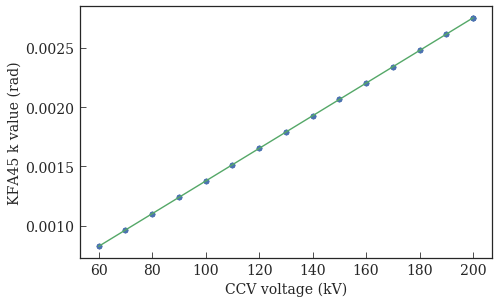

In [40]:
# myDataFrame[['logical_PI_KFA45.K.value','PI_KFA45.AQN1.value']]
xx = myDataFrame['PI_KFA45.CCV.value']
yy =  myDataFrame['logical_PI_KFA45.K.value']
plt.plot(xx, yy, 'o')
plt.xlabel('CCV voltage (kV)')
plt.ylabel('KFA45 k (rad)')

p = np.polyfit(xx,yy, 1)
plt.plot(xx, p[0]*xx+p[1])
print('Fit params '+str(p))